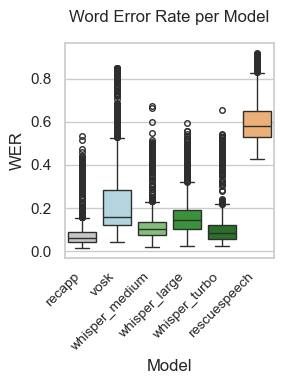

Plot saved at: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/wer_boxplot.png


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Input-Dateipfad
input_csv = '/Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/wer_scores_full.csv'

# 1) Daten laden
df = pd.read_csv(input_csv)
df["system"] = df["technology"] + "–" + df["model"]

# 2) Kurze Labels mappen (anpassen, falls nötig)
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

# 3) Reihenfolge & Farben (von LEX übernehmen)
order = ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}

# Ausreißer ändern (schwarze X und kleinerer Marker)
flierprops = dict(marker='o', color='black', markersize=4)  # Schwarze X und kleinerer Marker

# 4) Deskriptive Plots: WER-Verteilung pro System
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(3, 4))

ax = sns.boxplot(
    data=df,
    x="label",
    y="wer",
    order=[lbl for lbl in order if lbl in df["label"].unique()],
    palette=palette,
    flierprops=flierprops
)

ax.set_title("Word Error Rate per Model", pad=15)
ax.set_xlabel("Model")
ax.set_ylabel("WER")
plt.xticks(rotation=45, ha="right", fontsize=10)

# Ordner erstellen, falls er nicht existiert
output_dir = os.path.join(os.path.dirname(input_csv), "results_for_paper")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Dateipfad für das PNG-Bild
output_png = os.path.join(output_dir, "wer_boxplot.png")

# Plot als PNG mit höherer Auflösung (dpi=300)
plt.tight_layout()
plt.savefig(output_png, format="png", dpi=300)

# Plot anzeigen
plt.show()

# Ausgabe des gespeicherten Dateipfads
print(f"Plot saved at: {output_png}")


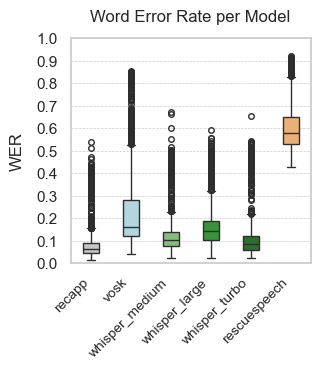

Plot saved at: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/wer_boxplot.png


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from matplotlib.ticker import MultipleLocator

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 1) Daten laden
csv_file = '/Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/wer_scores_full.csv'
df = pd.read_csv(csv_file)
df["system"] = df["technology"] + "–" + df["model"]

# 2) Labels mappen
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

# 3) Reihenfolge & Farben
order = [lbl for lbl in ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
         if lbl in df["label"].unique()]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}

# 4) Plot‑Style
sns.set(style="whitegrid", font_scale=1.0)

# 5) Figure & Axes absolut setzen (genau wie Lex, aber breiter)
fig = plt.figure(figsize=(3, 3))
# x0=0.12, Breite=0.80; y0/height wie gehabt
ax = fig.add_axes([0.12, 0.18, 0.80, 0.75])

# 6) Boxplot zeichnen
flierprops = dict(marker='o', color='black', markersize=4)
sns.boxplot(
    data=df,
    x="label", y="wer",
    order=order, palette=palette,
    flierprops=flierprops,
    ax=ax,
    width=0.4
)

# 7) Titel, Achsenbeschriftungen & fixe Y‑Skala
ax.set_title("Word Error Rate per Model", pad=12)
ax.set_xlabel("")  
ax.set_ylabel("WER", labelpad=8)
ax.set_ylim(0, 1)

# 8) Einheitliche Grid‑Linien
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(axis="y", which="major", linestyle="--", linewidth=0.5)

# 9) X‑Ticks rotieren
ax.set_xticklabels(order, rotation=45, ha="right", fontsize=10)

# 10) Ergebnis‑Ordner & Speichern
output_dir = os.path.join(os.path.dirname(csv_file), "results_for_paper")
os.makedirs(output_dir, exist_ok=True)
output_png = os.path.join(output_dir, "wer_boxplot.png")
# ohne tight_layout, dafür etwas Weißraum via pad_inches=0.1
fig.savefig(output_png, format="png", dpi=300, bbox_inches='tight', pad_inches=0.1)

# 11) Anzeige & Pfad
plt.show()
print(f"Plot saved at: {output_png}")


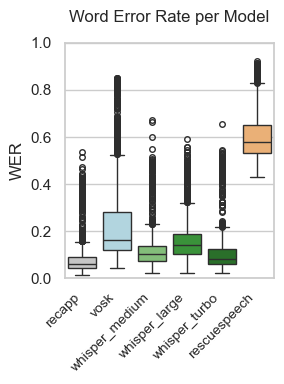

Plot saved at: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/wer_boxplot.png


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Input-Dateipfad
input_csv = '/Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/wer_scores_full.csv'

# 1) Daten laden
df = pd.read_csv(input_csv)
df["system"] = df["technology"] + "–" + df["model"]

# 2) Kurze Labels mappen (anpassen, falls nötig)
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

# 3) Reihenfolge & Farben
order = [lbl for lbl in ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
         if lbl in df["label"].unique()]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}
flierprops = dict(marker='o', color='black', markersize=4)

# 4) Plot-Settings
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(3, 4))

# 5) Boxplot zeichnen
ax = sns.boxplot(
    data=df,
    x="label",
    y="wer",
    order=order,
    palette=palette,
    flierprops=flierprops
)

# 6) Titel & Achsen
ax.set_title("Word Error Rate per Model", pad=15)
ax.set_xlabel("")
ax.set_ylabel("WER")

# 7) Einheitliche Y-Skala von 0 bis 1
ax.set_ylim(0, 1)
# → falls invertiert von oben (1) nach unten (0) gewünscht: ax.set_ylim(1, 0)

# 8) X‑Ticks drehen
plt.xticks(rotation=45, ha="right", fontsize=10)

# 9) Ergebnis-Ordner & Speichern
output_dir = os.path.join(os.path.dirname(input_csv), "results_for_paper")
os.makedirs(output_dir, exist_ok=True)
output_png = os.path.join(output_dir, "wer_boxplot.png")

plt.tight_layout()
plt.savefig(output_png, format="png", dpi=300)
plt.show()

print(f"Plot saved at: {output_png}")


In [9]:
import pandas as pd

# 1) Load WER data
# Assuming `df` already contains the WER data from the previous code
# If the WER data is in a separate CSV, load it here
# df_wer = pd.read_csv("path_to_wer_data.csv")

# 2) Group by Technology & Model: compute descriptive stats for WER
grouped_wer = df.groupby(["technology", "model"])['wer']
stats_wer_df = grouped_wer.agg(["mean", "median", "std", "min", "max"]).reset_index()

# Display the stats for WER by Technology & Model
print("=== WER by Technology & Model ===")
print(stats_wer_df)

# Save to CSV
#stats_wer_df.to_csv("wer_stats_by_model.csv", index=False)

=== WER by Technology & Model ===
   technology                 model      mean    median       std       min  \
0      recapp       gsw-CH_smoothed  0.082517  0.060867  0.073765  0.015300   
1        vosk    vosk-model-de-0.21  0.238892  0.160501  0.181878  0.042660   
2     whisper                 large  0.157431  0.142985  0.083679  0.022261   
3     whisper                medium  0.121912  0.101224  0.085090  0.021059   
4     whisper                 turbo  0.108199  0.083383  0.088795  0.022847   
5  whisper_v2  whisper_rescuespeech  0.600900  0.579723  0.099037  0.428815   

        max  
0  0.536585  
1  0.851986  
2  0.593031  
3  0.673868  
4  0.655052  
5  0.921335  


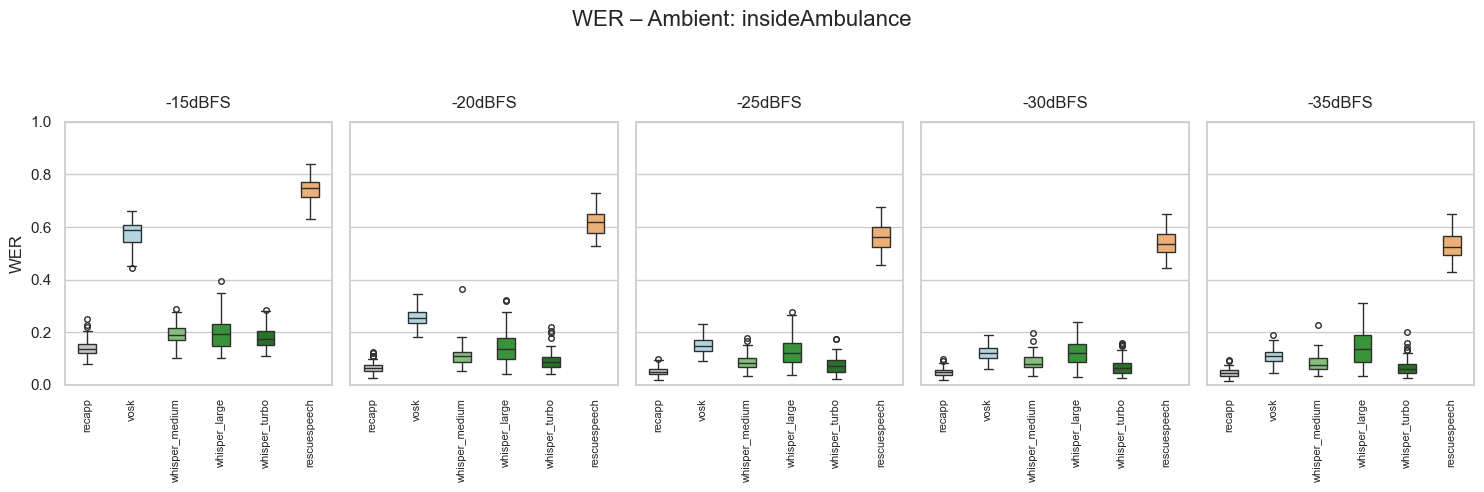

Plot saved at: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/wer_boxplot_insideAmbulance.png


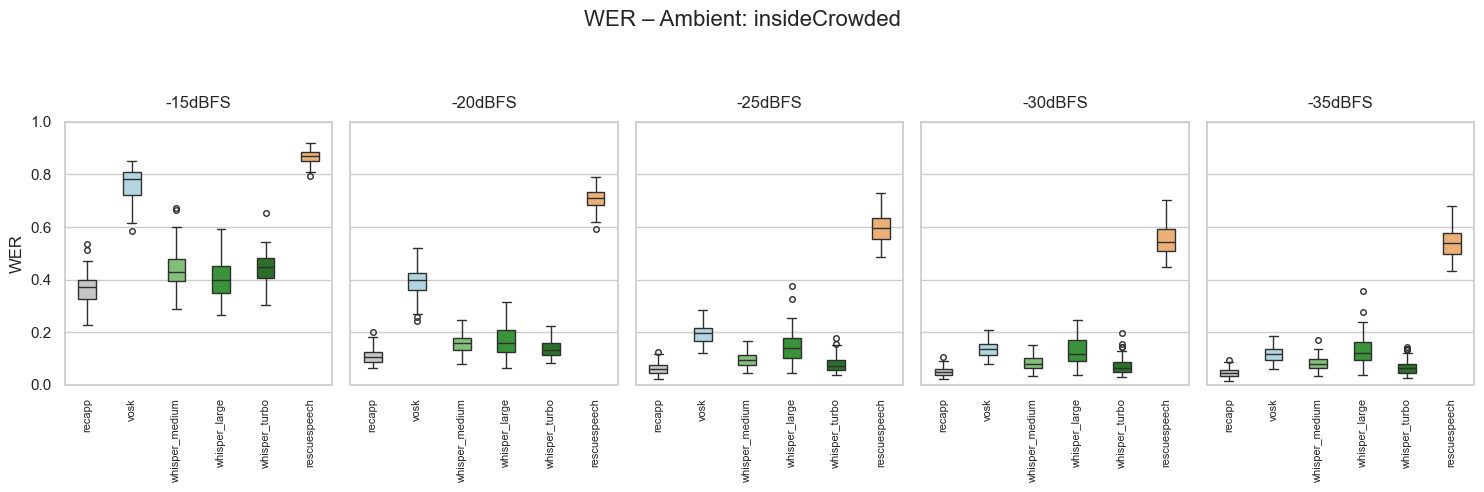

Plot saved at: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/wer_boxplot_insideCrowded.png


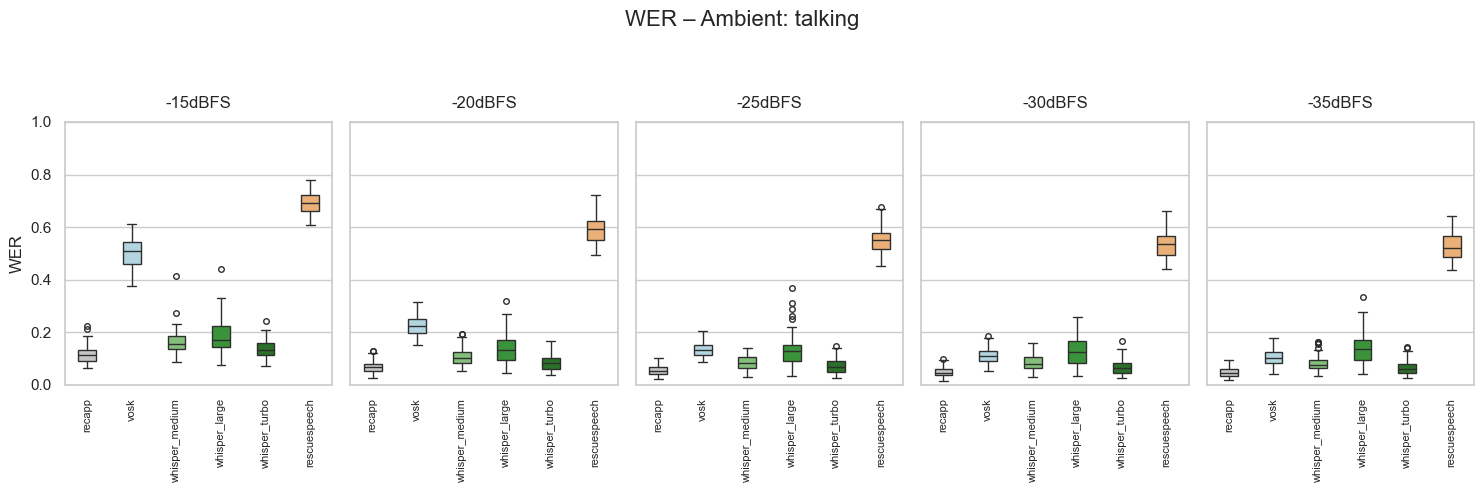

Plot saved at: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/wer_boxplot_talking.png


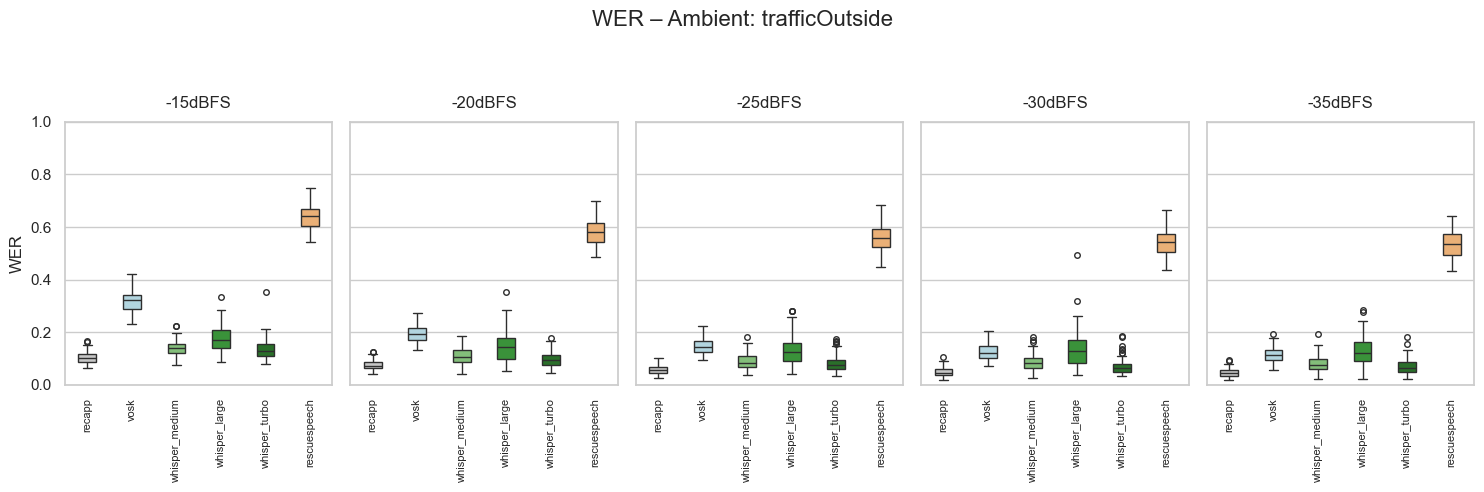

Plot saved at: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/wer_boxplot_trafficOutside.png


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Input-Dateipfad
input_csv = '/Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/wer_scores_full.csv'

# 1) Daten laden
df = pd.read_csv(input_csv)
df["system"] = df["technology"] + "–" + df["model"]

# 2) Kurze Labels mappen
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

# 3) Reihenfolge & Farben
order = ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}

# Ausreißer-Style
flierprops = dict(marker='o', color='black', markersize=4)

# Ergebnis-Ordner
output_dir = os.path.join(os.path.dirname(input_csv), "results_for_paper")
os.makedirs(output_dir, exist_ok=True)

# 5) Split nach AmbientVariant × Volume für Detail‑Plots
volumes = sorted(df["processedVolume"].unique())

for amb in sorted(df["ambientVariant"].unique()):
    sub_amb = df[df["ambientVariant"] == amb]
    if sub_amb.empty:
        continue

    fig, axes = plt.subplots(1, len(volumes), figsize=(len(volumes)*3, 5), sharey=True)

    for i, vol in enumerate(volumes):
        ax = axes[i]
        sub = sub_amb[sub_amb["processedVolume"] == vol]

        sns.boxplot(
            data=sub,
            x="label", y="wer",
            order=order, palette=palette,
            ax=ax, width=0.4, flierprops=flierprops
        )

        ax.set_title(vol, pad=10)
        ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel("WER")
        else:
            ax.set_ylabel("")
        ax.set_xticklabels(order, rotation=90, fontsize=8)

        # **Festes Y‑Limit für Vergleichbarkeit**
        ax.set_ylim(0, 1)

    # Supertitel
    fig.suptitle(f"WER – Ambient: {amb}", fontsize=16)

    # Layout so anpassen, dass der Titel nicht abgeschnitten wird
    plt.tight_layout(rect=[0, 0, 1, 0.92])

    # Als PNG speichern
    output_png = os.path.join(output_dir, f"wer_boxplot_{amb}.png")
    fig.savefig(output_png, format="png", dpi=300)

    # Anzeigen und Pfad ausgeben
    plt.show()
    print(f"Plot saved at: {output_png}")


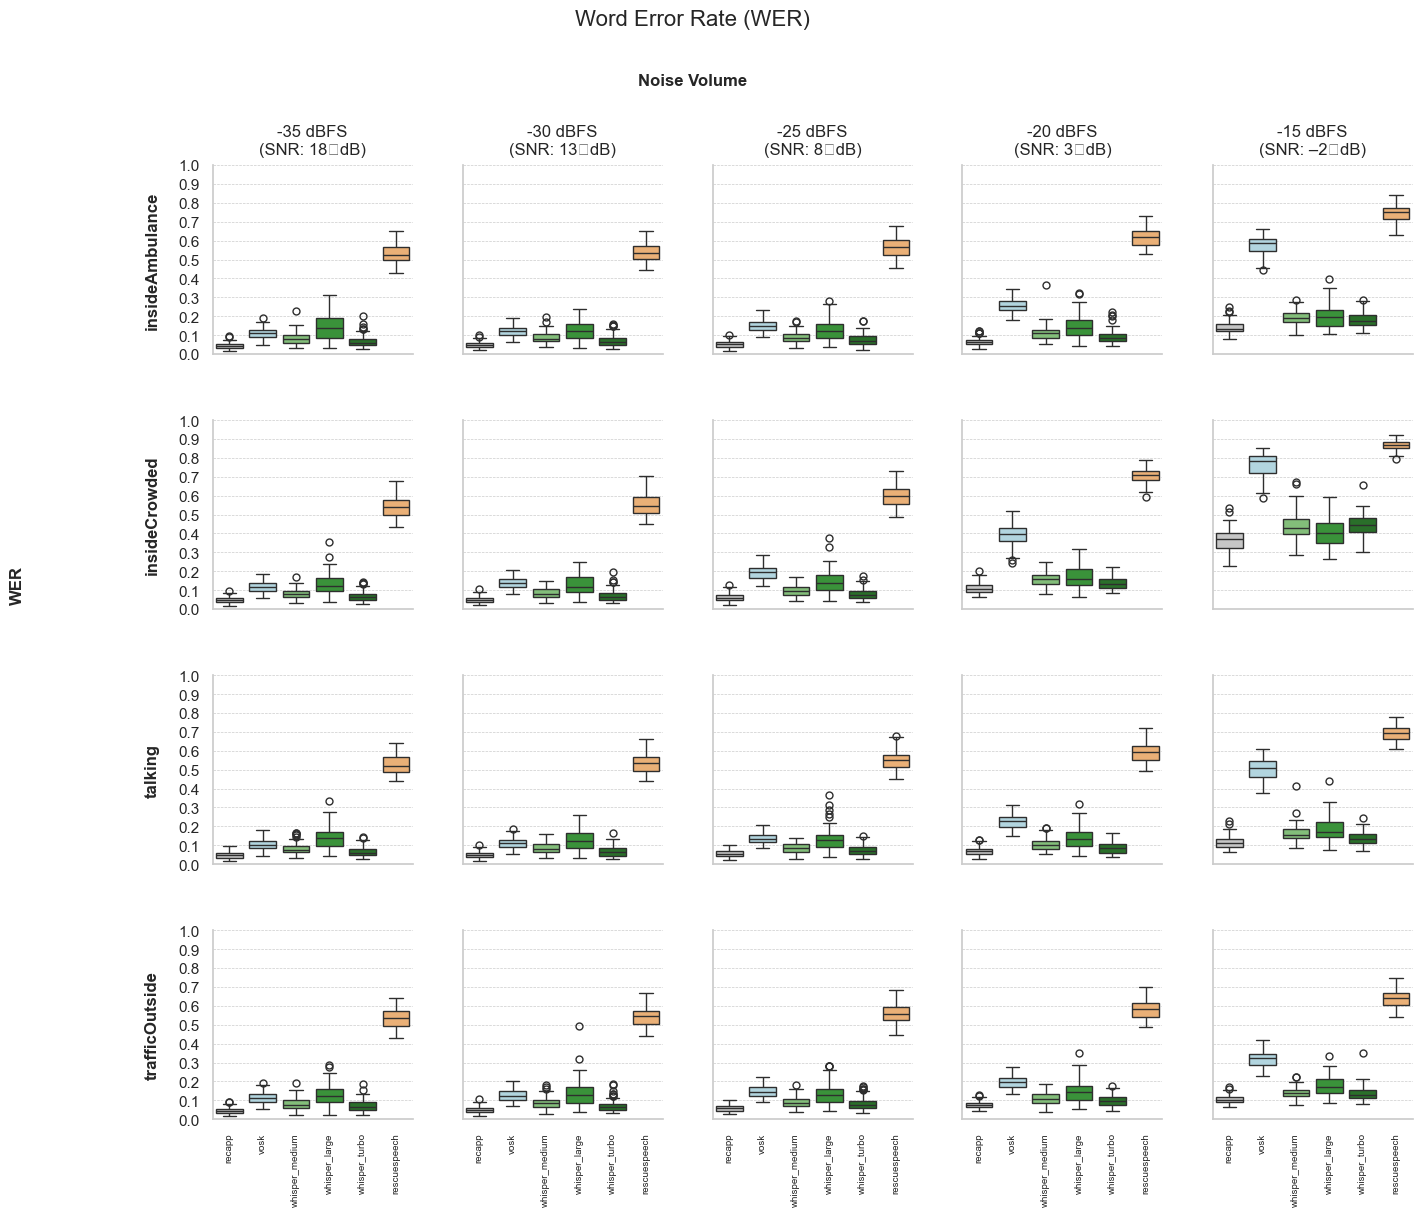

Plot saved at: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/wer_facetgrid.png


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from matplotlib.ticker import MultipleLocator

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Input-Dateipfad
input_csv = '/Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/wer_scores_full.csv'
df = pd.read_csv(input_csv)
df["system"] = df["technology"] + "–" + df["model"]

# Labels mappen
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

# Reihenfolge & Farben
order = ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}

# dBFS- & Ambient-Varianten
volumes = ["-35dBFS","-30dBFS","-25dBFS","-20dBFS","-15dBFS"]
vol_labels = {
    "-35dBFS": "-35 dBFS\n(SNR: 18 dB)",
    "-30dBFS": "-30 dBFS\n(SNR: 13 dB)",
    "-25dBFS": "-25 dBFS\n(SNR: 8 dB)",
    "-20dBFS": "-20 dBFS\n(SNR: 3 dB)",
    "-15dBFS": "-15 dBFS\n(SNR: –2 dB)"
}
ambients = sorted(df["ambientVariant"].unique())

sns.set(style="whitegrid", font_scale=1.0)

# FacetGrid erstellen
g = sns.catplot(
    data=df,
    x="label", y="wer",
    row="ambientVariant", col="processedVolume",
    kind="box",
    order=order, palette=palette,
    height=3, aspect=1,
    sharey=True, margin_titles=True, legend=False,
    col_order=volumes,
    row_order=ambients
)

# Default-Titles entfernen
g.set_titles(row_template="", col_template="")

# Abstände & Supertitel
g.fig.subplots_adjust(
    top=0.85,
    left=0.18,
    right=0.98,
    hspace=0.35,
    wspace=0.25
)
g.fig.suptitle("Word Error Rate (WER)", fontsize=16)

# Noise Volume-Label über den Columns
g.fig.text(
    0.50, 0.92,
    "Noise Volume",
    ha="center", va="center",
    fontsize=12, fontweight="bold"
)

# Facet-Column-Titles mit SNR
for idx, vol in enumerate(volumes):
    ax = g.axes[0][idx]
    ax.set_title(vol_labels[vol], pad=8)

# Feintuning der einzelnen Facets
for row_idx, amb in enumerate(ambients):
    for col_idx, vol in enumerate(volumes):
        ax = g.axes[row_idx][col_idx]
        ax.set_ylim(0, 1)
        ax.yaxis.set_major_locator(MultipleLocator(0.1))
        ax.grid(axis="y", which="major", linestyle="--", linewidth=0.5)
        ax.set_xticklabels(order, rotation=90, ha="center", fontsize=7)
        ax.set_xlabel("")
        ax.set_ylabel("")

    # Manuelles Ambient-Label links außen
    ax0 = g.axes[row_idx][0]
    ax0.text(
        -0.30, 0.5, amb,
        ha="center", va="center",
        rotation=90, transform=ax0.transAxes,
        fontsize=12, fontweight="bold"
    )

# Ein einziges Y‑Achsen-Label ganz links
g.fig.text(
    0.05, 0.5,
    "WER",
    ha="center", va="center",
    rotation="vertical",
    fontsize=12, fontweight="bold"
)

# Ergebnisse-Ordner erstellen & speichern
output_dir = os.path.join(os.path.dirname(input_csv), "results_for_paper")
os.makedirs(output_dir, exist_ok=True)
output_png = os.path.join(output_dir, "wer_facetgrid.png")
g.fig.savefig(output_png, format="png", dpi=300)

# Plot anzeigen & Pfad ausgeben
plt.show()
print(f"Plot saved at: {output_png}")


In [10]:
# 6) Multikollinearität prüfen
# Basierend auf OLS-Designmatrix
# (Wir definieren dazu kurz das Modell ohne Fit, um X zu bekommen)
formula = "wer ~ C(system) + C(ambientVariant) + C(processedVolume)"
model_temp = smf.ols(formula, data=df)
X = model_temp.exog
names = model_temp.exog_names
vif = pd.DataFrame({
    "variable": names,
    "VIF": [variance_inflation_factor(X, i) for i in range(X.shape[1])]
})
print(vif)

                                        variable        VIF
0                                      Intercept  13.000000
1           C(system)[T.vosk–vosk-model-de-0.21]   1.666667
2   C(system)[T.whisper_v2–whisper_rescuespeech]   1.666667
3                     C(system)[T.whisper–large]   1.666667
4                    C(system)[T.whisper–medium]   1.666667
5                     C(system)[T.whisper–turbo]   1.666667
6             C(ambientVariant)[T.insideCrowded]   1.500000
7                   C(ambientVariant)[T.talking]   1.500000
8            C(ambientVariant)[T.trafficOutside]   1.500000
9                  C(processedVolume)[T.-20dBFS]   1.600000
10                 C(processedVolume)[T.-25dBFS]   1.600000
11                 C(processedVolume)[T.-30dBFS]   1.600000
12                 C(processedVolume)[T.-35dBFS]   1.600000


In [11]:
# 7) OLS mit cluster-robusten SEs
# Kategorische Baselines setzen
df["system"] = pd.Categorical(df["system"], 
                              categories=["recapp–gsw-CH_smoothed"] + 
                                         [s for s in df["system"].unique() if s!="recapp–gsw-CH_smoothed"])
df["ambientVariant"] = pd.Categorical(df["ambientVariant"], 
                                      categories=["trafficOutside"] + 
                                                 [a for a in df["ambientVariant"].unique() if a!="trafficOutside"])
df["processedVolume"] = pd.Categorical(df["processedVolume"], 
                                       categories=["-35dBFS"] + 
                                                  [v for v in df["processedVolume"].unique() if v!="-35dBFS"])

ols = smf.ols(formula, data=df).fit()
ols_clust = ols.get_robustcov_results(cov_type="cluster", groups=df["convoID"])
print(ols_clust.summary())

                            OLS Regression Results                            
Dep. Variable:                    wer   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     2582.
Date:                Thu, 24 Jul 2025   Prob (F-statistic):          8.45e-117
Time:                        09:34:58   Log-Likelihood:                 14187.
No. Observations:               11880   AIC:                        -2.835e+04
Df Residuals:                   11867   BIC:                        -2.825e+04
Df Model:                          12                                         
Covariance Type:              cluster                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [12]:
# Arbeitsverzeichnis anzeigen (Arbeitsverzeichnis des Notebooks)
current_working_dir = os.getcwd()
print(f"Der Arbeitsordner ist: {current_working_dir}")

Der Arbeitsordner ist: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics


# Saving

In [13]:
import os
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

# 1) Arbeitsverzeichnis anzeigen (Arbeitsverzeichnis des Notebooks)
current_working_dir = os.getcwd()
print(f"Der Arbeitsordner ist: {current_working_dir}")

# 2) Verzeichnis für den Export erstellen (falls noch nicht vorhanden)
export_dir = os.path.join(current_working_dir, 'results_for_paper/')
os.makedirs(export_dir, exist_ok=True)

# -----------------------
# 3) OLS-Regression durchführen und Ergebnisse extrahieren
ols = smf.ols(formula, data=df).fit()
ols_clust = ols.get_robustcov_results(cov_type="cluster", groups=df["convoID"])

# 4) Zusammenfassung der OLS-Ergebnisse extrahieren
summary = ols_clust.summary2()
summary_df = summary.tables[1]  # Tabelle mit den Koeffizienten

# 5) Speichern der OLS-Ergebnisse als CSV und Excel-Datei
summary_csv_file = os.path.join(export_dir, "ols_clust_results_wer.csv")
summary_df.to_csv(summary_csv_file)
summary_excel_file = os.path.join(export_dir, "ols_clust_results_wer.xlsx")
summary_df.to_excel(summary_excel_file)

# Ausgabe zur Bestätigung
print(f"Die OLS-Ergebnisse wurden gespeichert unter {summary_csv_file} und {summary_excel_file}")

# -----------------------
# 6) Multikollinearität prüfen (VIF)
# Basierend auf OLS-Designmatrix
formula_vif = "wer ~ C(system) + C(ambientVariant) + C(processedVolume)"
model_temp = smf.ols(formula_vif, data=df)
X = model_temp.exog
names = model_temp.exog_names

# Berechnen des VIF
vif = pd.DataFrame({
    "variable": names,
    "VIF": [variance_inflation_factor(X, i) for i in range(X.shape[1])]
})

# Speichern der VIF-Ergebnisse als CSV und Excel-Datei
vif_csv_file = os.path.join(export_dir, "vif_results_wer.csv")
vif.to_csv(vif_csv_file, index=False)
vif_excel_file = os.path.join(export_dir, "vif_results_wer.xlsx")
vif.to_excel(vif_excel_file, index=False)

# Bestätigung der gespeicherten VIF-Ergebnisse
print(f"Die VIF-Ergebnisse wurden gespeichert unter {vif_csv_file} und {vif_excel_file}")

# -----------------------
# 7) Deskriptive Statistiken für WER berechnen
grouped_wer = df.groupby(["technology", "model"])['wer']
stats_wer_df = grouped_wer.agg(["mean", "median", "std", "min", "max"]).reset_index()

# Speichern der WER-Statistiken als CSV und Excel-Datei
wer_stats_csv_file = os.path.join(export_dir, "wer_stats_by_model.csv")
stats_wer_df.to_csv(wer_stats_csv_file, index=False)
wer_stats_excel_file = os.path.join(export_dir, "wer_stats_by_model.xlsx")
stats_wer_df.to_excel(wer_stats_excel_file, index=False)

# Bestätigung der gespeicherten WER-Ergebnisse
print(f"Die WER-Statistiken wurden gespeichert unter {wer_stats_csv_file} und {wer_stats_excel_file}")


Der Arbeitsordner ist: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics
Die OLS-Ergebnisse wurden gespeichert unter /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/ols_clust_results_wer.csv und /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/ols_clust_results_wer.xlsx
Die VIF-Ergebnisse wurden gespeichert unter /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/vif_results_wer.csv und /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/vif_results_wer.xlsx
Die WER-Statistiken wurden gespeichert unter /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/wer_stats_by_model.csv und /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/wer_statistics/results_for_paper/wer_stats_by_model.xlsx


# Some Checks

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# OLS-Residuen und Design-Matrix (ohne Intercept-Spalte)
resid = ols.resid
exog = ols.model.exog
bp_test = het_breuschpagan(resid, exog)
labels = ["Lagrange-Multiplier", "p-value", "f-statistic", "f-p-value"]
print(dict(zip(labels, bp_test)))


In [ ]:
from statsmodels.regression.mixed_linear_model import MixedLM

# Null‐Modell: nur Intercept, zufälliger Intercept pro convoID
null = MixedLM.from_formula("wer ~ 1", groups="convoID", data=df).fit()
var_between = null.cov_re.iloc[0,0]
var_within  = null.scale
icc = var_between / (var_between + var_within)
print(f"ICC: {icc:.3f}")


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Annahme: ols_clust ist dein mit cluster-robusten SEs gefittetes Modell
# und df ist dein DataFrame.

# 1. Fitted values und Residuen extrahieren
fitted = ols_clust.fittedvalues
residuals = ols_clust.resid

# 2. Histogramm der Residuen
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=50, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. QQ-Plot der Residuen
sm.qqplot(residuals, line='45')
plt.title('QQ-Plot of Residuals')
plt.tight_layout()
plt.show()

# 4. Residuals vs. Fitted
plt.figure(figsize=(8, 4))
plt.scatter(fitted, residuals, alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.tight_layout()
plt.show()

# Optional: Residuals vs. Fitted farbcodiert nach Lautstärke-Bins
volumes = df['processedVolume'].unique()
colors = plt.cm.tab10(range(len(volumes)))
color_map = dict(zip(volumes, colors))

plt.figure(figsize=(8, 4))
for vol in volumes:
    mask = df['processedVolume'] == vol
    plt.scatter(fitted[mask], residuals[mask],
                color=color_map[vol], alpha=0.5, label=vol)
plt.axhline(0, linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted (colored by Volume)')
plt.legend(title='Volume Bin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
